2023-05-12 09:52:03.124818: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 09:52:04.001609: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/opt/conda/lib
2023-05-12 09:52:04.001682: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dle

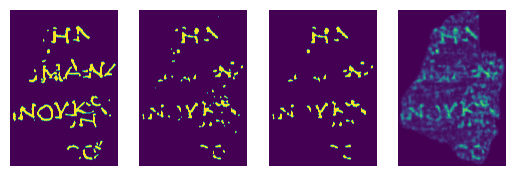

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from train import find_threshold_percentile, fbeta_score, EXP_ID
import PIL.Image as Image

fold = 2
logdir = "resnetrs50_split3d5x7csn_mixup_ep25"
true = np.array(
    Image.open(
        f"../../input/vesuvius-challenge-ink-detection-5fold/train/{str(fold + 1)}/inklabels.png"
    ).convert("1")
)
pred = np.load(f"../../logs/exp{EXP_ID}/{logdir}/fold{fold}/preds_tta.npy")
pred_pp = np.load(f"../../logs/exp{EXP_ID}/{logdir}/fold{fold}/preds_pp.npy")
logit = np.load(f"../../logs/exp{EXP_ID}/{logdir}/fold{fold}/logits_tta.npy")
plt.subplot(141)
plt.axis("off")
plt.imshow(true)
plt.subplot(142)
plt.axis("off")
plt.imshow(pred)
plt.subplot(143)
plt.axis("off")
plt.imshow(pred_pp)
plt.subplot(144)
plt.axis("off")
plt.imshow(logit, vmin=0., vmax=1.0)
# fbeta_score(true, pred, use_mask=np.ones_like(pred))

In [ ]:
from train import PatchDataset
from glob import glob
fragment_id = 1
valid_volume_paths = np.asarray(
    sorted(
        glob(
            f"../../input/vesuvius_patches_32_5fold/train/{fragment_id}/surface_volume/**/*.npy",
            recursive=True,
        )
    )
)
